In [4]:
from PIL import Image
import glob
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

print('complete')

print(os.getenv("HOME")+"/rock_scissor_paper/paper")
path = os.getenv("HOME")+"/rock_scissor_paper/paper"+'/*.png'
images=glob.glob(path + "/*.png")
# img = Image.open(images)
print(images)

complete
/aiffel/rock_scissor_paper/paper
[]


In [5]:
def resize_images(img_path):
    
    images=glob.glob(img_path + "/*.png")
  
    target_size=(28,28)
    
    for img in images:
        try:
            old_img=Image.open(img)
            
            new_img=old_img.resize(target_size,Image.ANTIALIAS)

            new_img.save(img, "JPEG")
        except :
            pass
    
    
    print(len(images), "img resized.")
    
image_dir_path = os.getenv("HOME") +"/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") +"/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") +"/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)
print("이미지 resize 완료!")


90 img resized.
247 img resized.
155 img resized.
이미지 resize 완료!


x_train shape: (500, 28, 28, 3)
y_train shape: (500,)
라벨:  0


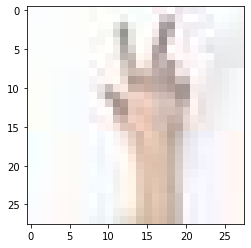

In [60]:
import numpy as np
import cv2

def load_data(img_path, number_of_data=500):  
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=(28)
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.png'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
        #print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"

(x_train, y_train) = load_data(image_dir_path)
# print(y_train) # 라벨값이 잘들어가있다

x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
# y_train은 라벨값이고 간단한 값이니 정규화를 하지 않는다

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))


plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# print(x_train)
# print(y_train)
# shape 이 다르다..?

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_34 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 64)                51264     
_________________________________________________________________
dense_69 (Dense)             (None, 3)               

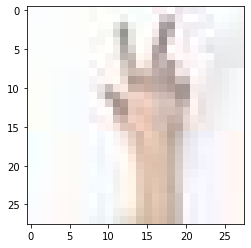

In [66]:
#딥러닝 설계

n_channel_1=16
n_channel_2=32
n_dense=64
n_train_epoch=10

model=keras.models.Sequential()
#모델 추가
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))


model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

# 모델 학습


model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=n_train_epoch)


# # 테스트 이미지
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/"
(x_test, y_test)=load_data(image_dir_path)

print("x_train shape: {}".format(x_test.shape))
print("y_train shape: {}".format(y_test.shape))

import matplotlib.pyplot as plt
plt.imshow(x_test[0])
print('라벨: ', y_test[0])


# #모델 테스트
# test_loss, test_accuracy = model.evaluate(x_train_norm, y_test, verbose=2)
# print("test_loss: {} ".format(test_loss))
# print("test_accuracy: {}".format(test_accuracy))

a
